# Importance of Learning Rate

In this test, we're going to test the effects of learning rate in machine learning models but firstly we must understand what is learning rate. We must go deep of machine learning basics and we must understand the mathematic behind machine learning. 


## Cost Function 

Cost function can be change depends to the situation but the logic of the cost function is calculating the difference between model's prediction and actual value. 

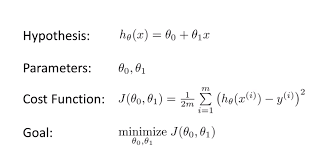

This cost function is build for regression problems but in this test we're going to work on classification problem and our cost function is going to be like that:

<img src='https://i.stack.imgur.com/XbU4S.png'>



## Where is learning rate ?

We use learning rate when we update our parameter that model use to calculate a result. 

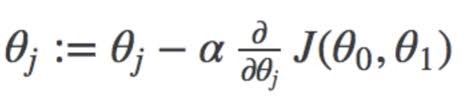

In this equation model's learning rate is defined as 'a' and we're updating model's parameters with this method that name is Gradient Descent and there are many method to update model's parameters such as Adam optimizer but all the methods use learning rate parameter for updating.

We can suppose learning rate as moving step because as you can see learning rate affecting the model directly and that's mean we must be careful when we choose learning rate parameter.

<img src='https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png' style = 'width: 100%;' >

# Dataset

In this test, we're going to use MNIST dataset. If I need give some information about MNIST it's include many handwritten number , it's very common dataset and it's very stable dataset to use. 

### Let's start !

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

(trainSet , testSet) , setInfo = tfds.load('mnist' ,
                                           split = ['train' , 'test'] ,
                                           shuffle_files = True,
                                           with_info = True,
                                           as_supervised = True)

#Importing the MNIST Dataset

In [2]:
def normalize_img(image, label):
    
  return tf.cast(image, tf.float32) / 255., label

# Important NOTE : Normalizing image is important for training because our dataset contain number between 0 and 255 
# and we reduce this range between 0 and 1 and we change the datatype to float32 ofcourse.

trainSet = trainSet.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
trainSet = trainSet.cache()

#We use cache for improving the performance of the training

trainSet = trainSet.shuffle(setInfo.splits['train'].num_examples)

# Shuffling the set for the true randomness

trainSet = trainSet.batch(128)

# Batching the dataset ( we might do same thing with choosing batch size when train our model with model.fit method)

trainSet = trainSet.prefetch(tf.data.experimental.AUTOTUNE)
                             
# Prefetching is improving the performance of training. You can check the details about prefetching
# in here: https://www.tensorflow.org/guide/data_performance#prefetching

testSet = testSet.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
testSet = testSet.batch(128)
testSet = testSet.cache()
testSet = testSet.prefetch(tf.data.experimental.AUTOTUNE)

# Model 

We're going to use basic CNN model. The structure of model is not important for now. We are focusing on the learning rate.

In [ ]:
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Reshape , Input

# Importing the required layers

learningRateList = [10,3,1,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001,0.00003]

historys = []

for learning_rate in learningRateList:
    
    model = tf.keras.Sequential([
        Input(shape = (28,28)),
        Reshape((28,28,1)),
        Conv2D(32,(3,3), activation = 'relu'),
        Flatten(),
        Dense(10)
    ])
    
    # We used reshape layer because our dataset shape is ( 28 , 28 ) and conv2d layer accept only 3 dimensional input.
    
    opt = tf.keras.optimizers.SGD(learning_rate = learning_rate)
    
    model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True))
    
    history = model.fit(trainSet ,
             epochs = 50,
             verbose = 2,
             validation_data = testSet)
    
    historys.append(history)

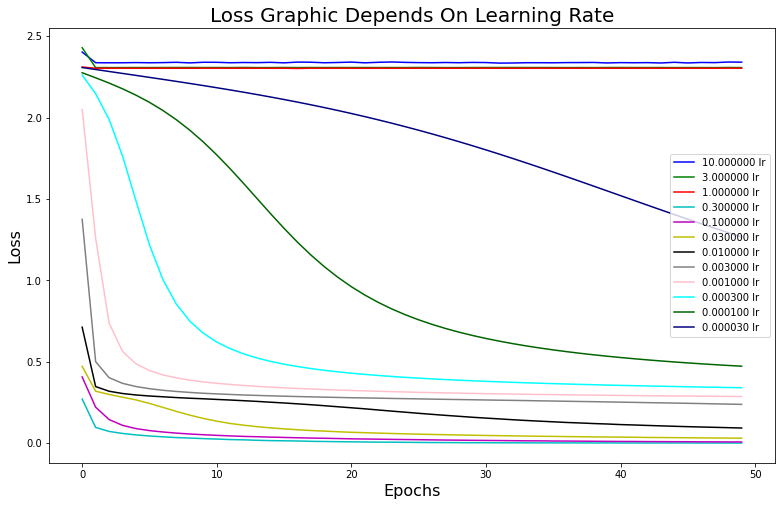

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,8))
colors = ['b','g','r','c','m','y','k','gray','pink','cyan','darkgreen','navy']

for index,history in enumerate(historys):
    
    loss = history.history['loss']
    plt.plot(loss ,linestyle ='-',color = colors[index], label = '%f lr' % learningRateList[index])
    
plt.xlabel('Epochs',fontsize = 16)
plt.ylabel('Loss',fontsize = 16)
plt.title('Loss Graphic Depends On Learning Rate',fontsize = 20)
plt.legend()
plt.show()

# Results

As you can see, some learning rate parameters are failed to find the global minima point such as 10,3,1 and some learning rate parameters were so slow when finding the global minima point such as .00003 , .0001 , .0003 , .001 , .003 and we got the best result with .3 learning rate. It was faster than the others and it could find the best minima point. 

In conclusion, we got some information about choosing the right learning rate parameter. Actually, it can be variable based on the optimizer. For instance, when using Adam optimizer we must use smaller learning rate parameter than SGD optimizer because they have different learning methods but the logic behind the optimizers is same. In addition, these results aren't mean that the best learning rate for SGD is .3 , we did this test to get an intuition when choosing the learning rate and understand the math behind that. It can be changeable depends on datasets , machine learning model , parameters amount etc... So we must be careful when choosing the learning rate if it's so large , our models cannot learn the trainset and if it's so small , we will face with performance issues.